# Predicting Video Game Ownership Based on Game and Publisher Attributes
C. C. Stepien 

## Project Outline
### The Problem

In direct contrast to most other industries, very little video game sales and ownership data is publically available. This makes video game market research, positioning and sales work extremely challenging. It is especially hard for small, 'indie' game studios because they frequently don't have the $50-100k to shell out for market research that larger publishers might be better equipped to take on. As Director of Marketing for one such small independent studio, I am personally interested in better forecasting tools for predicting video game ownership.

To address this knowledge gap, Sergey Galyonkin developed and published SteamSpy in 2015 using an algorithm to predict the number of owners for each video game on the game store Steam using publically available data from the site's APIs. SteamSpy is heavily relied on by the industry for market research and game development for one-person shops and major publishers alike. However, Steam's parent company Valve changed the Steam Web and Store APIs in early April 2018 so that the games a user owns are no longer publically available data. While SteamSpy has updated their prediction model and is still live, it is unknown how much longer enough data will be available to estimate game ownership for the industry. Moreso, while SteamSpy is a fantastic resource, leveraging this resource to make predictions for upcoming games is left to the individual researcher. 

### Goals and Deliverables

**Description of relationship between owners and game attributes of published games**: use ownership estimates from SteamSpy to investigate the correlation between number of owners and number of reviews, game genre, studio size, game price, and other data. How does the distribution of ratings impact overall sales? Number of negative vs posivite reviews?

**Prediction of future ownership rates based on game attributes for unpublished games**: predict the estimated number of owners for a not-yet released game based on the game's attributes, using a model trained from a subset of the SteamSpy dataset.

**Production of a forecasting tool to support game developers**: use the model trained on SteamSpy data to create a tool that allows game developers to input their game project's attributes to produce an estimation of the number of owners they might expect when they release their game. 

### The Data

I downloaded the full list of games and game details (about 17,000 games) for which there are owner estimations. In addition to number of owners, there is a suite of data on the studio, publisher, genre, tags (user-selected labels) and pricing.

While the lack of published games data makes it challenging to verify the accuracy of the SteamSpy algorithm, what little sales data has been published indicates that SteamSpy is quite accurate.

Currently I have only 1 time point for game sales data. I'll have to take into account the year the game was published and apply an adjustment to the ownership and review data. This can be explored by first looking at the number of reviews as a function of time since the game was published to see how reviews accrue over time for each cohort.  SteamSpy also has archived time point data, and I plan to reach out regarding additional time points after looking through initial results with a single time point.

## Initial Results

In [45]:
# Import packages

import numpy as np
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load initial json data file and get type

games = json.load(open('js_game_details.json'))
#print(games[0])
#print('games is a ' + str(type(games)))
#print('An entry in games is a ' + str(type(games[0])))

In [44]:
# Test json_normalize function on single entry 
# This function can take dict or list of dicts
# We have a list of dicts

dota2 = pd.DataFrame.from_dict(json_normalize(games[0]))
# print(dota2)

In [4]:
# Convert the entire json file to a pandas dataframe

games_df = pd.DataFrame.from_dict(json_normalize(games))

In [6]:
# Look over some entries in the dataframe

# games_df.iloc[0]

Text(0.5,1,'Number of owners based on number of reviews')

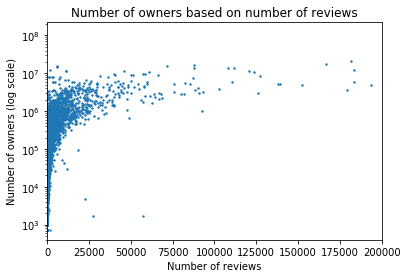

In [52]:
# Average number of owners as a function of number of reviews
import matplotlib.pyplot as plt
%matplotlib inline

games_df['reviews'] = games_df['positive'] + games_df['negative']

plt.scatter(games_df.reviews, games_df.owners, s = 2)
plt.xlim((0, 200000))
plt.yscale('log')
plt.xlabel('Number of reviews')
plt.ylabel('Number of owners (log scale)')
plt.title('Number of owners based on number of reviews')

Text(0.5,1,'Number of owners based on % of reviews that are negative')

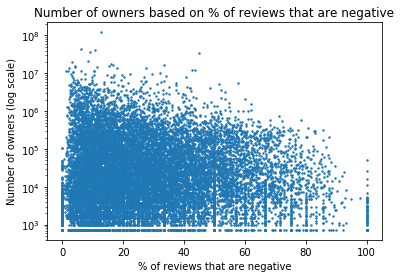

In [53]:
# Number of owners as a function of % negative reviews

games_df['negative_prop'] = 100*games_df['negative']/games_df['reviews']
plt.scatter(games_df.negative_prop, games_df.owners, s = 2)
plt.yscale('log')
plt.xlabel('% of reviews that are negative')
plt.ylabel('Number of owners (log scale)')
plt.title('Number of owners based on % of reviews that are negative')